# Salary Estimation using K-Nearest Neighbor 

### Importing all libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading datasets

In [2]:
data = pd.read_csv("/home/darshan/Pantech AI ML Projects/K-Nearest Neighbor/salary.csv")

In [3]:
data

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


### Summarise Dataset

In [4]:
data.shape

(32561, 5)

In [5]:
data.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [6]:
data.isna().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [7]:
data[data==0].count()

age                   0
education.num         0
capital.gain      29849
hours.per.week        0
income                0
dtype: int64

### Mapping Salary Data to binary

In [8]:
data.replace(["<=50K",">50K"],[0,1],inplace=True)

In [9]:
data

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
...,...,...,...,...,...
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0


### Dividing dataset into X, Y

In [10]:
X = data.iloc[:,:-1]
X

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
...,...,...,...,...
32556,22,10,0,40
32557,27,12,0,38
32558,40,9,0,40
32559,58,9,0,40


In [11]:
Y = data.iloc[:,-1]
pd.DataFrame(Y)

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


### Spliting dataset 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [14]:
x_train

,age,education.num,capital.gain,hours.per.week
26464,55,3,0,40
16134,42,9,0,40
4747,42,9,0,40
8369,25,10,0,40
5741,60,6,0,40
...,...,...,...,...
13123,90,10,0,40
19648,36,9,0,40
9845,26,8,0,51
10799,44,14,0,40


In [15]:
x_test

,age,education.num,capital.gain,hours.per.week
22278,56,5,0,40
8950,19,9,0,25
7838,23,10,0,35
16505,37,13,0,40
19140,49,14,0,50
...,...,...,...,...
4149,67,9,1086,35
17168,28,13,0,25
21748,44,10,0,55
18155,58,9,0,50


In [16]:
pd.DataFrame(y_train)

,income
26464,0
16134,0
4747,0
8369,0
5741,0
...,...
13123,0
19648,0
9845,0
10799,1


In [17]:
pd.DataFrame(y_test)

,income
22278,0
8950,0
7838,0
16505,0
19140,1
...,...
4149,0
17168,0
21748,0
18155,0


### Feature Scaling Using Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [20]:
x_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

In [21]:
x_test

array([[ 1.27591266, -1.98305776, -0.14509813, -0.03923011],
       [-1.43485534, -0.42608063, -0.14509813, -1.25599461],
       [-1.14179934, -0.03683634, -0.14509813, -0.44481828],
       ...,
       [ 0.39674466, -0.03683634, -0.14509813,  1.1775344 ],
       [ 1.42244067, -0.42608063, -0.14509813,  0.77194623],
       [ 1.20264866, -0.03683634, -0.14509813,  0.36635806]])

### Finding Best K Value

In [22]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Mean Error')

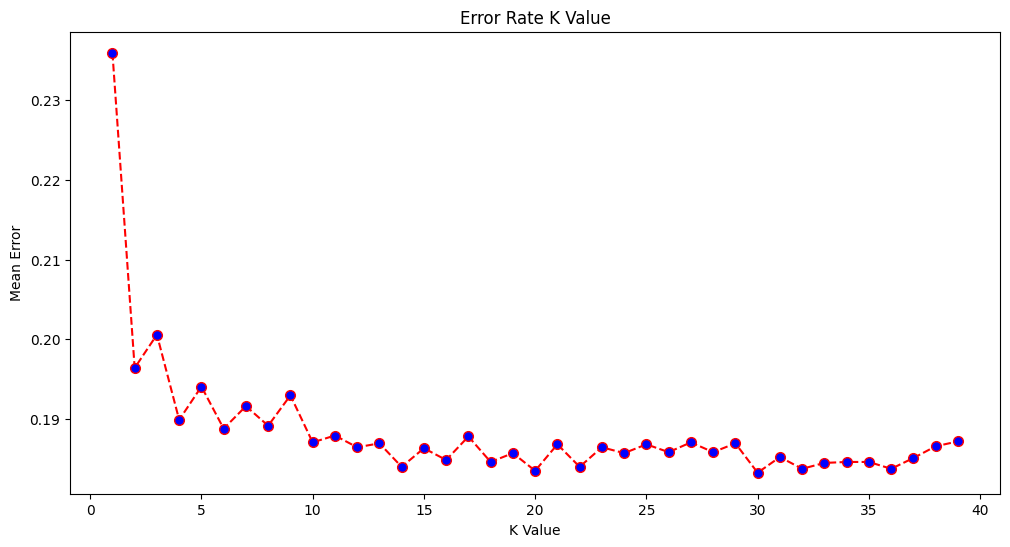

In [23]:
error=[]
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(12,6))
#plt.plot(x,y,marker,color)
plt.plot(range(1,40),error,color="red",linestyle="dashed",marker="o",markerfacecolor="blue",markersize=7)
plt.title("Error Rate K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

### Building Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier(n_neighbors=20,metric="minkowski",p=2)#that means we are using euclidean distance
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

### Prediction

In [32]:
age = int(input("Enter the age : "))
edu = int(input("Enter Employee's Education : "))
cg = int(input("Enter the Capital Gain : "))
wh = int(input("Enter Hour's Per week : "))
newemp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newemp))
print(result)

if(result==1):
    print("Employee Got Salary More than 50K")
else:
    print("Employee Got Salary less than or equal to 50K")

Enter the age :  45
Enter Employee's Education :  5
Enter the Capital Gain :  1
Enter Hour's Per week :  90


[0]
Employee Got Salary less than or equal to 50K


### Preduicting for all records

In [35]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

### Evaluation

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score

In [36]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is : ")
print(cm)

Confusion Matrix is : 
[[5889  304]
 [1190  758]]


In [39]:
accu = accuracy_score(y_pred,y_test)
print("Accuracy of Model : ")
print(accu)

Accuracy of Model : 
0.8164844613683823


In [40]:
pre = precision_score(y_pred,y_test)
print("Precision of Model : ")
print(pre)

Precision of Model : 
0.3891170431211499


In [42]:
recall = recall_score(y_pred,y_test)
print("Recall of Model : ")
print(recall)

Recall of Model : 
0.7137476459510358
